# TFT(PyTorch)

## 패키지 설치

In [ ]:
# pip install pytorch_forecasting

In [ ]:
# pip install holidays

## 데이터 로딩

In [36]:
import numpy as np
import pandas as pd

train = pd.read_csv("./data/tabular-playground-series-sep-2022/train.csv")
test = pd.read_csv("./data/tabular-playground-series-sep-2022/test.csv")

train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])

data = pd.concat([train, test], axis = 0, ignore_index=True)

## 데이터 확인

### 데이터 중복 확인

In [10]:
assert len(data.drop_duplicates(['country', 'store', 'product', 'date'])) == len(data)

assert len(data.drop_duplicates(['country', 'store', 'product'])) == len(data)//data['date'].nunique()

display(train.sample(4))

,row_id,date,country,store,product,num_sold
54781,54781,2020-02-16,France,KaggleRama,Kaggle Getting Started,115
59211,59211,2020-05-18,Italy,KaggleMart,Kaggle for Kids: One Smart Goose,360
33230,33230,2018-11-24,France,KaggleRama,Kaggle Recipe Book,97
64859,64859,2020-09-13,France,KaggleMart,Kaggle for Kids: One Smart Goose,463


### 결측치 확인


In [9]:
(train.isna().sum(axis = 0).rename('nans_per_column_train').rename_axis('column').reset_index().set_index('column')
 .join(test.isna().sum(axis = 0).rename('nans_per_column_test').rename_axis('column').reset_index().set_index('column')))

,nans_per_column_train,nans_per_column_test
column,,
row_id,0,0.0
date,0,0.0
country,0,0.0
store,0,0.0
product,0,0.0
num_sold,0,NaN


### 고유값 확인

In [11]:
(train.nunique(axis = 0).rename('n_unique_per_column_train').rename_axis('column').reset_index().set_index('column')
 .join(test.nunique(axis = 0).rename('n_unique_per_column_test').rename_axis('column').reset_index().set_index('column')))

,n_unique_per_column_train,n_unique_per_column_test
column,,
row_id,70128,17520.0
date,1461,365.0
country,6,6.0
store,2,2.0
product,4,4.0
num_sold,699,NaN


### 데이터 분포 시각화

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

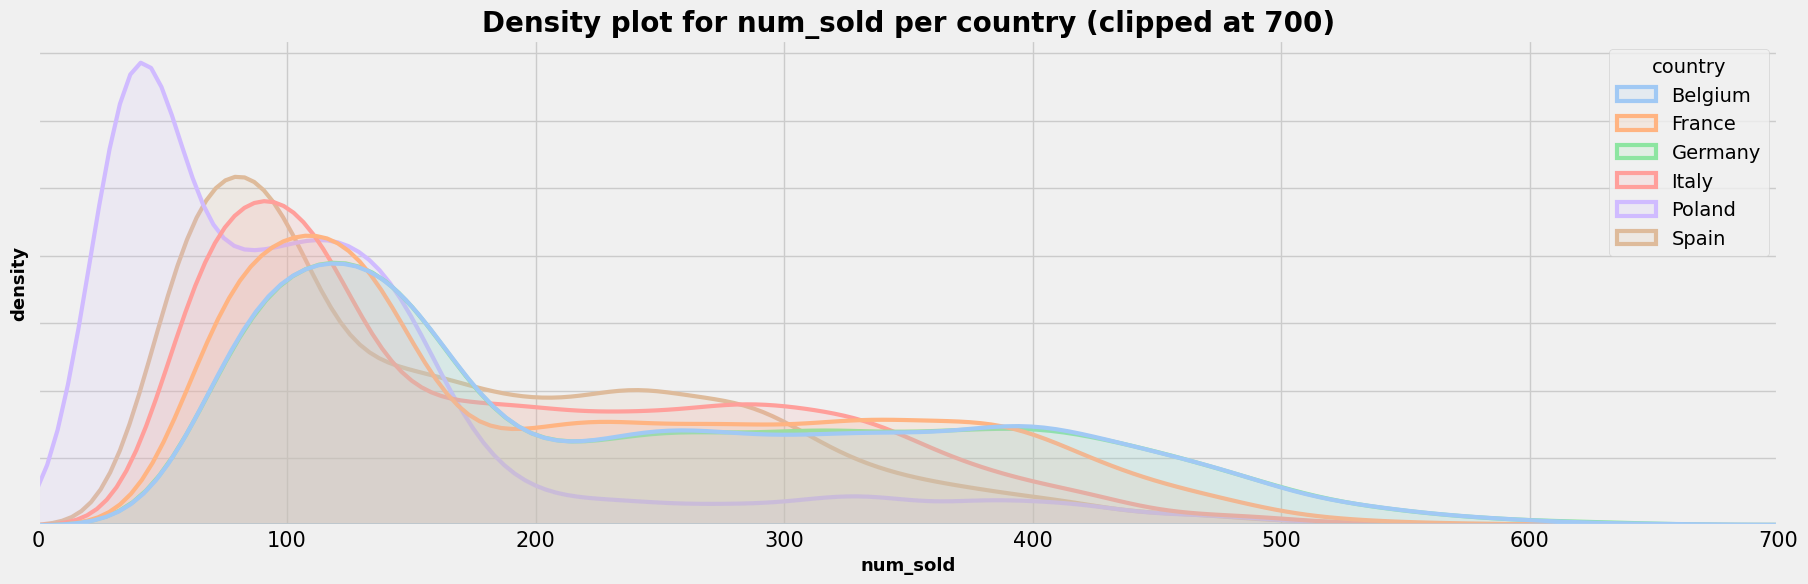

In [15]:
fig, ax = plt.subplots(1,1, figsize=(20, 6))

# kernel density estimate
sns.kdeplot(data=train, x = 'num_sold', hue = 'country', fill=True, alpha = 0.15, ax = ax, linewidth=3, palette='pastel')

# 축 이름 설정
ax.set_xlabel('num_sold', color='black', fontweight='bold', fontsize=13)
ax.set_ylabel('density', color='black', fontweight='bold', fontsize=13)

# 축 범위 설정
ax.set_xlim(0, 700)

# 축 눈금 관련 설정(labelsize = 글자 크기, [] = 눈금 표시 해제)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_ticklabels([])

# plot 제목 설정
ax.set_title('Density plot for num_sold per country (clipped at 700)', fontweight = 'bold', fontsize = 20)

plt.show()

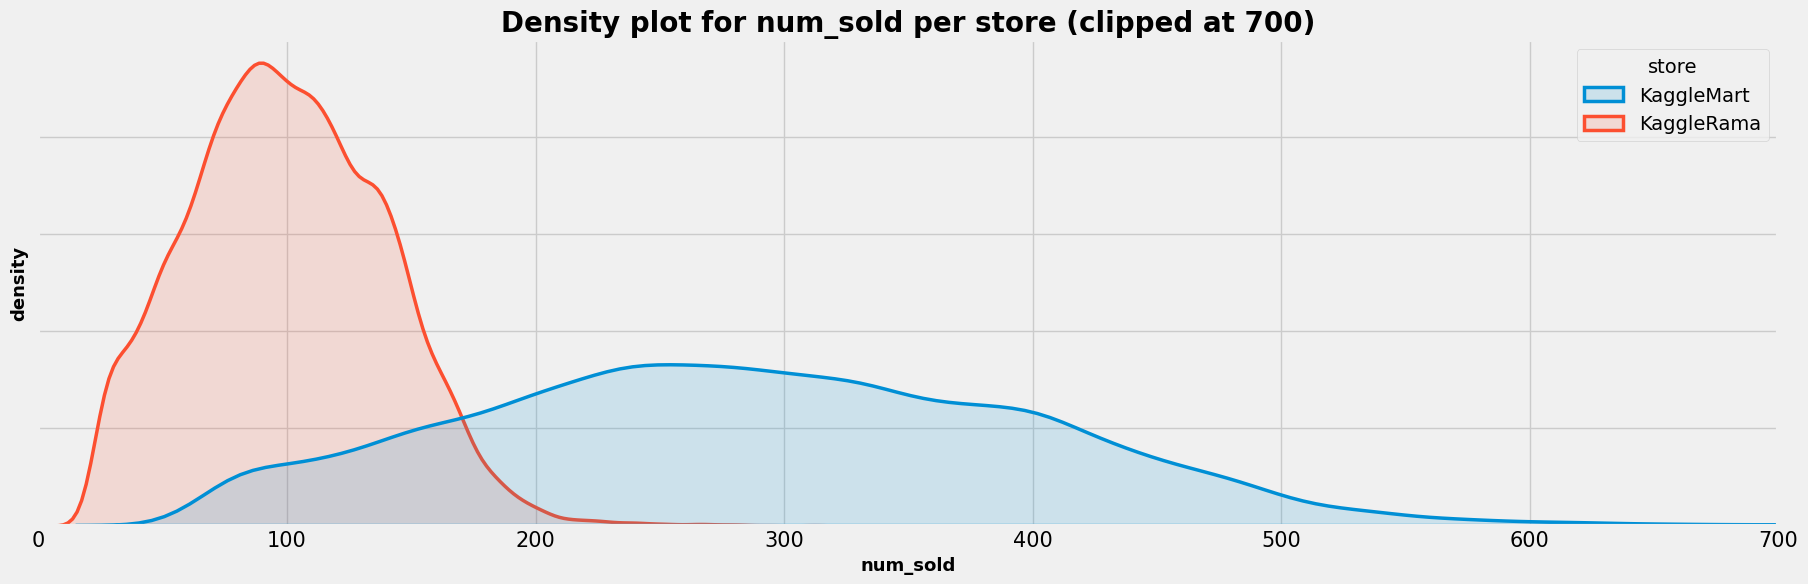

In [16]:
fig, ax = plt.subplots(1,1, figsize=(20, 6))

# kernel density estimate
sns.kdeplot(data=train, x = 'num_sold', hue = 'store', fill=True, alpha = 0.15, ax = ax, linewidth=2.5)

# 축 이름 설정
ax.set_xlabel('num_sold', color='black', fontweight='bold', fontsize=13)
ax.set_ylabel('density', color='black', fontweight='bold', fontsize=13)

# 축 범위 설정
ax.set_xlim(0, 700)

# 축 눈금 관련 설정(labelsize = 글자 크기, [] = 눈금 표시 해제)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_ticklabels([])

# plot 제목 설정
ax.set_title('Density plot for num_sold per store (clipped at 700)', fontweight = 'bold', fontsize = 20)

plt.show()

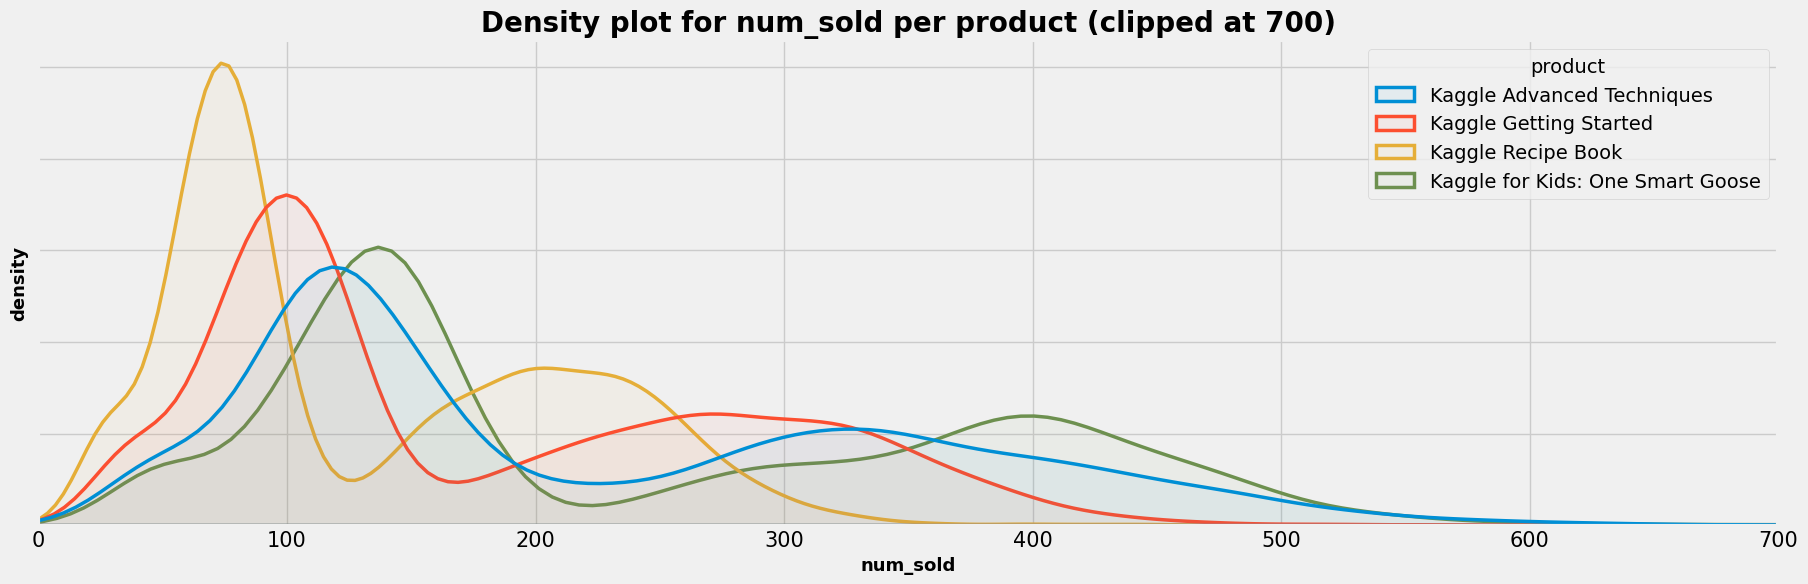

In [17]:
fig, ax = plt.subplots(1,1, figsize=(20, 6))

sns.kdeplot(data=train, x = 'num_sold', hue = 'product', fill=True, alpha = 0.05, ax = ax, linewidth=2.5)
ax.set_xlabel('num_sold', color='black', fontweight='bold', fontsize=13)
ax.set_ylabel('density', color='black', fontweight='bold', fontsize=13)
ax.set_xlim(0, 700)
ax.set_title('Density plot for num_sold per product (clipped at 700)', fontweight = 'bold', fontsize = 20)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_ticklabels([])

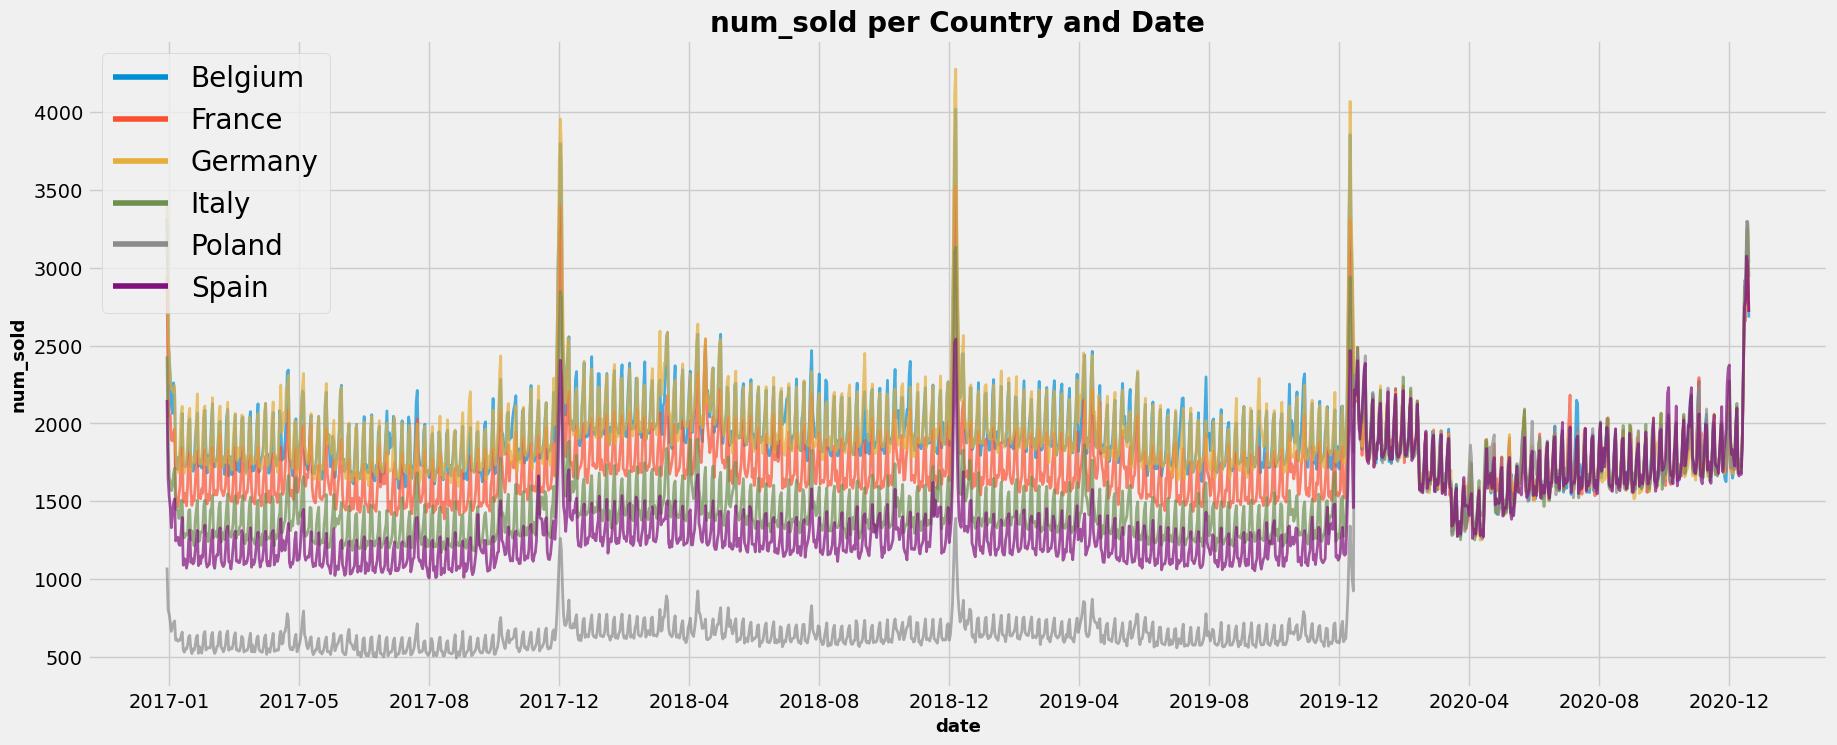

In [19]:
fig, ax = plt.subplots(1, 1, figsize = (20, 8))

# 꺾은선 그래프
sns.lineplot(x='date',y='num_sold',hue='country',data=(train.groupby(['date', 'country']).num_sold.sum().rename('num_sold').reset_index().sort_values('date', ascending = True, ignore_index=True)), linewidth = 2, alpha = 0.7)

# 축 표시형식 설정
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=120)) 

ax.set_xlabel('date', color='black', fontweight='bold', fontsize=13)
ax.set_ylabel('num_sold', color='black', fontweight='bold', fontsize=13)

ax.legend(fontsize = 20, loc = 'upper left')

ax.set_title('num_sold per Country and Date', fontweight = 'bold', fontsize = 20)

Text(0.5, 1.0, 'num_sold per Store and Date')

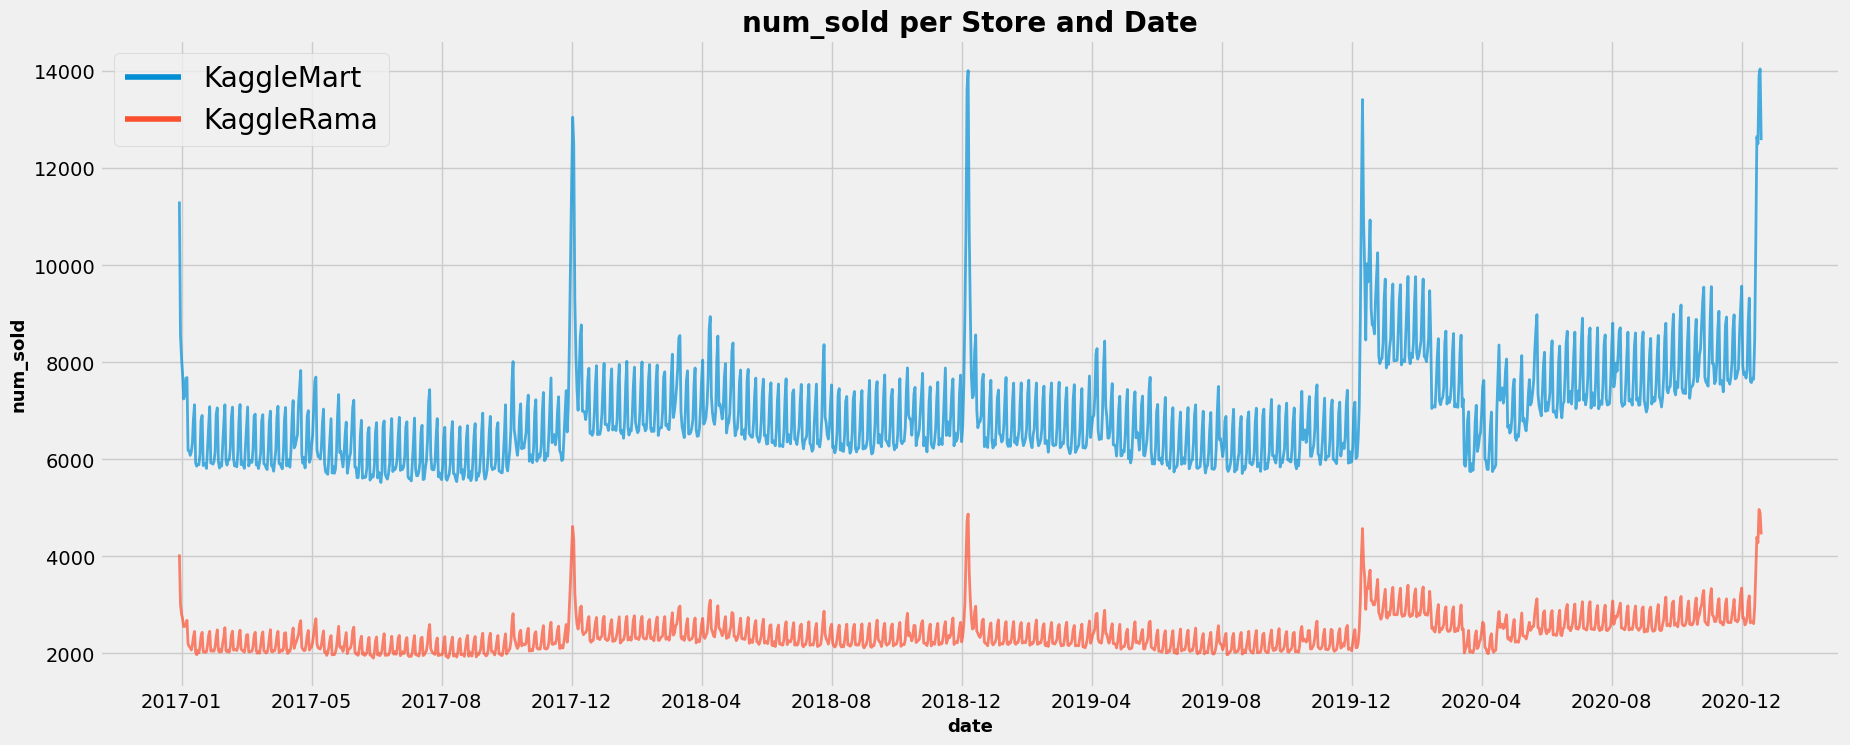

In [20]:
fig, ax = plt.subplots(1, 1, figsize = (20, 8))


sns.lineplot(x='date',y='num_sold',hue='store',data=(train.groupby(['date', 'store']).num_sold.sum().rename('num_sold').reset_index().sort_values('date', ascending = True, ignore_index=True)), linewidth = 2, alpha = 0.7)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=120)) 

ax.set_xlabel('date', color='black', fontweight='bold', fontsize=13)
ax.set_ylabel('num_sold', color='black', fontweight='bold', fontsize=13)

ax.legend(fontsize = 20, loc = 'upper left')

ax.set_title('num_sold per Store and Date', fontweight = 'bold', fontsize = 20)

Text(0.5, 1.0, 'num_sold per Product and Date')

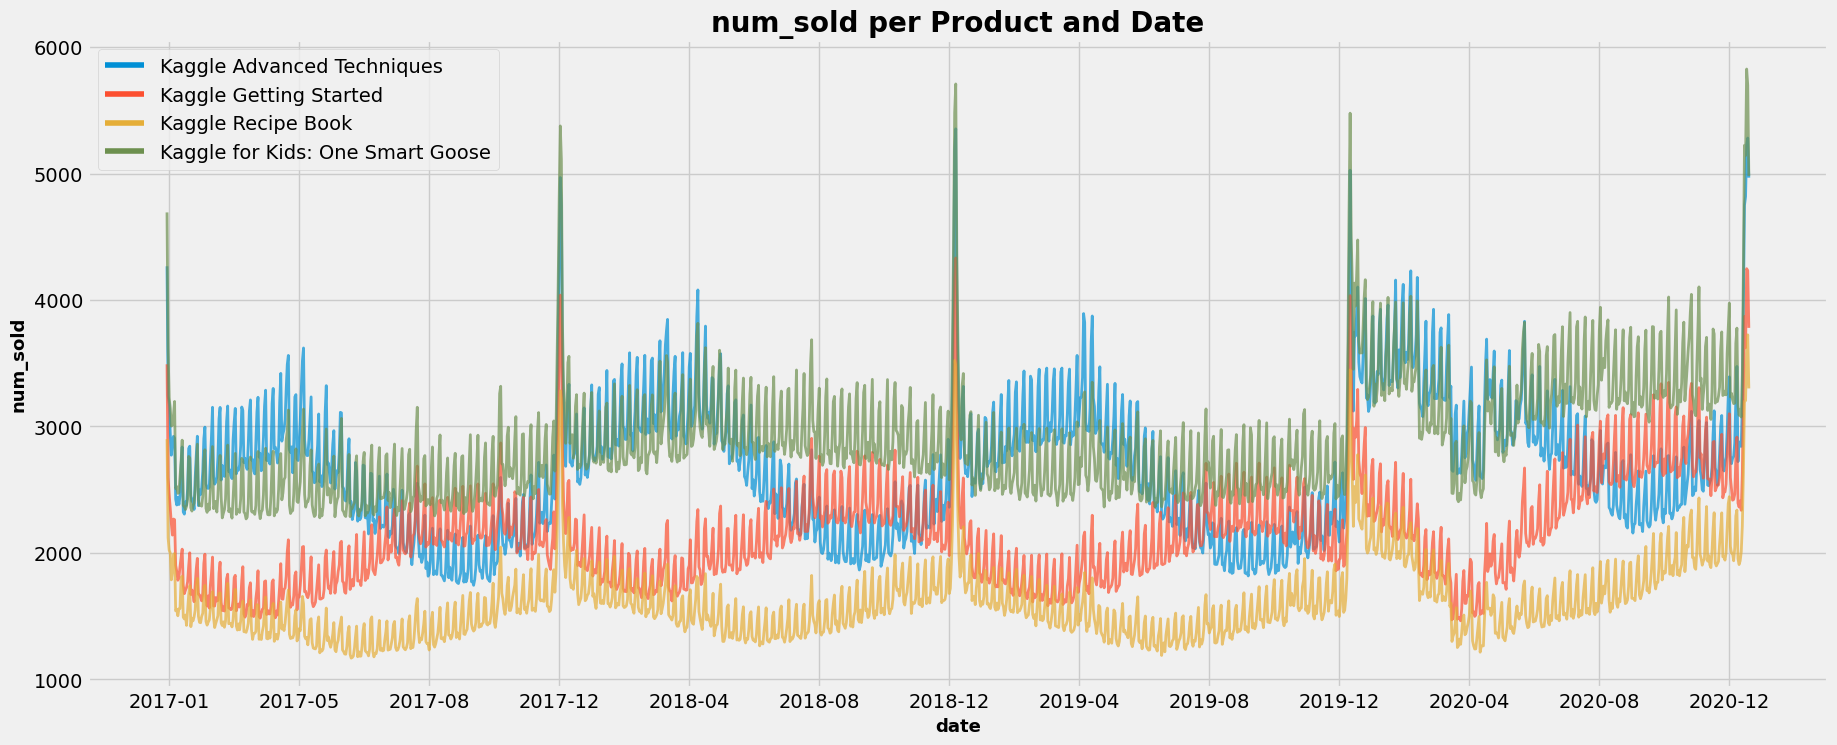

In [23]:
fig, ax = plt.subplots(1, 1, figsize = (20, 8))

sns.lineplot(x='date',y='num_sold',hue='product',data=(train.groupby(['date', 'product']).num_sold.sum().rename('num_sold').reset_index().sort_values('date', ascending = True, ignore_index=True)), linewidth = 2, alpha = 0.7)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=120)) 

ax.set_xlabel('date', color='black', fontweight='bold', fontsize=13)
ax.set_ylabel('num_sold', color='black', fontweight='bold', fontsize=13)

ax.legend()

ax.set_title('num_sold per Product and Date', fontweight = 'bold', fontsize = 20)

### 상관관계 확인

In [30]:
# 데이터 pivoting
all_time_series = (train.drop(['row_id'], axis = 1).pivot(columns = ['country', 'store', 'product'], index = 'date', values = 'num_sold'))
all_time_series.columns = list(map(lambda x: "_".join(x), all_time_series.columns))

# numpy array 설정
corr_matrix = round(all_time_series.corr(), 2)
corr_matrix

,Belgium_KaggleMart_Kaggle Advanced Techniques,Belgium_KaggleMart_Kaggle Getting Started,Belgium_KaggleMart_Kaggle Recipe Book,Belgium_KaggleMart_Kaggle for Kids: One Smart Goose,Belgium_KaggleRama_Kaggle Advanced Techniques,Belgium_KaggleRama_Kaggle Getting Started,Belgium_KaggleRama_Kaggle Recipe Book,Belgium_KaggleRama_Kaggle for Kids: One Smart Goose,France_KaggleMart_Kaggle Advanced Techniques,France_KaggleMart_Kaggle Getting Started,...,Poland_KaggleRama_Kaggle Recipe Book,Poland_KaggleRama_Kaggle for Kids: One Smart Goose,Spain_KaggleMart_Kaggle Advanced Techniques,Spain_KaggleMart_Kaggle Getting Started,Spain_KaggleMart_Kaggle Recipe Book,Spain_KaggleMart_Kaggle for Kids: One Smart Goose,Spain_KaggleRama_Kaggle Advanced Techniques,Spain_KaggleRama_Kaggle Getting Started,Spain_KaggleRama_Kaggle Recipe Book,Spain_KaggleRama_Kaggle for Kids: One Smart Goose
Belgium_KaggleMart_Kaggle Advanced Techniques,1.00,0.03,0.50,0.54,0.94,0.04,0.51,0.54,0.89,-0.05,...,-0.09,-0.13,0.52,-0.21,0.14,0.07,0.52,-0.22,0.14,0.07
Belgium_KaggleMart_Kaggle Getting Started,0.03,1.00,0.65,0.71,0.05,0.93,0.64,0.70,-0.04,0.86,...,-0.03,-0.08,-0.18,0.48,0.26,0.20,-0.19,0.47,0.25,0.19
Belgium_KaggleMart_Kaggle Recipe Book,0.50,0.65,1.00,0.75,0.52,0.65,0.92,0.76,0.44,0.57,...,0.06,-0.06,0.23,0.28,0.47,0.25,0.22,0.28,0.48,0.24
Belgium_KaggleMart_Kaggle for Kids: One Smart Goose,0.54,0.71,0.75,1.00,0.55,0.71,0.75,0.88,0.49,0.66,...,0.03,-0.01,0.24,0.33,0.34,0.31,0.23,0.32,0.34,0.31
Belgium_KaggleRama_Kaggle Advanced Techniques,0.94,0.05,0.52,0.55,1.00,0.06,0.53,0.56,0.89,-0.03,...,-0.09,-0.13,0.52,-0.20,0.15,0.07,0.52,-0.21,0.15,0.07
Belgium_KaggleRama_Kaggle Getting Started,0.04,0.93,0.65,0.71,0.06,1.00,0.65,0.70,-0.03,0.87,...,-0.02,-0.07,-0.16,0.49,0.28,0.22,-0.17,0.49,0.26,0.21
Belgium_KaggleRama_Kaggle Recipe Book,0.51,0.64,0.92,0.75,0.53,0.65,1.00,0.76,0.44,0.57,...,0.05,-0.07,0.22,0.28,0.47,0.25,0.21,0.28,0.47,0.24
Belgium_KaggleRama_Kaggle for Kids: One Smart Goose,0.54,0.70,0.76,0.88,0.56,0.70,0.76,1.00,0.50,0.65,...,0.03,-0.01,0.25,0.32,0.35,0.32,0.24,0.31,0.34,0.31
France_KaggleMart_Kaggle Advanced Techniques,0.89,-0.04,0.44,0.49,0.89,-0.03,0.44,0.50,1.00,-0.02,...,0.18,0.15,0.72,-0.04,0.33,0.29,0.72,-0.05,0.33,0.30
France_KaggleMart_Kaggle Getting Started,-0.05,0.86,0.57,0.66,-0.03,0.87,0.57,0.65,-0.02,1.00,...,0.28,0.24,0.03,0.71,0.49,0.47,0.02,0.71,0.47,0.47


In [31]:
levels = np.linspace(-1, 1, 16)
levels

array([-1.        , -0.86666667, -0.73333333, -0.6       , -0.46666667,
       -0.33333333, -0.2       , -0.06666667,  0.06666667,  0.2       ,
        0.33333333,  0.46666667,  0.6       ,  0.73333333,  0.86666667,
        1.        ])

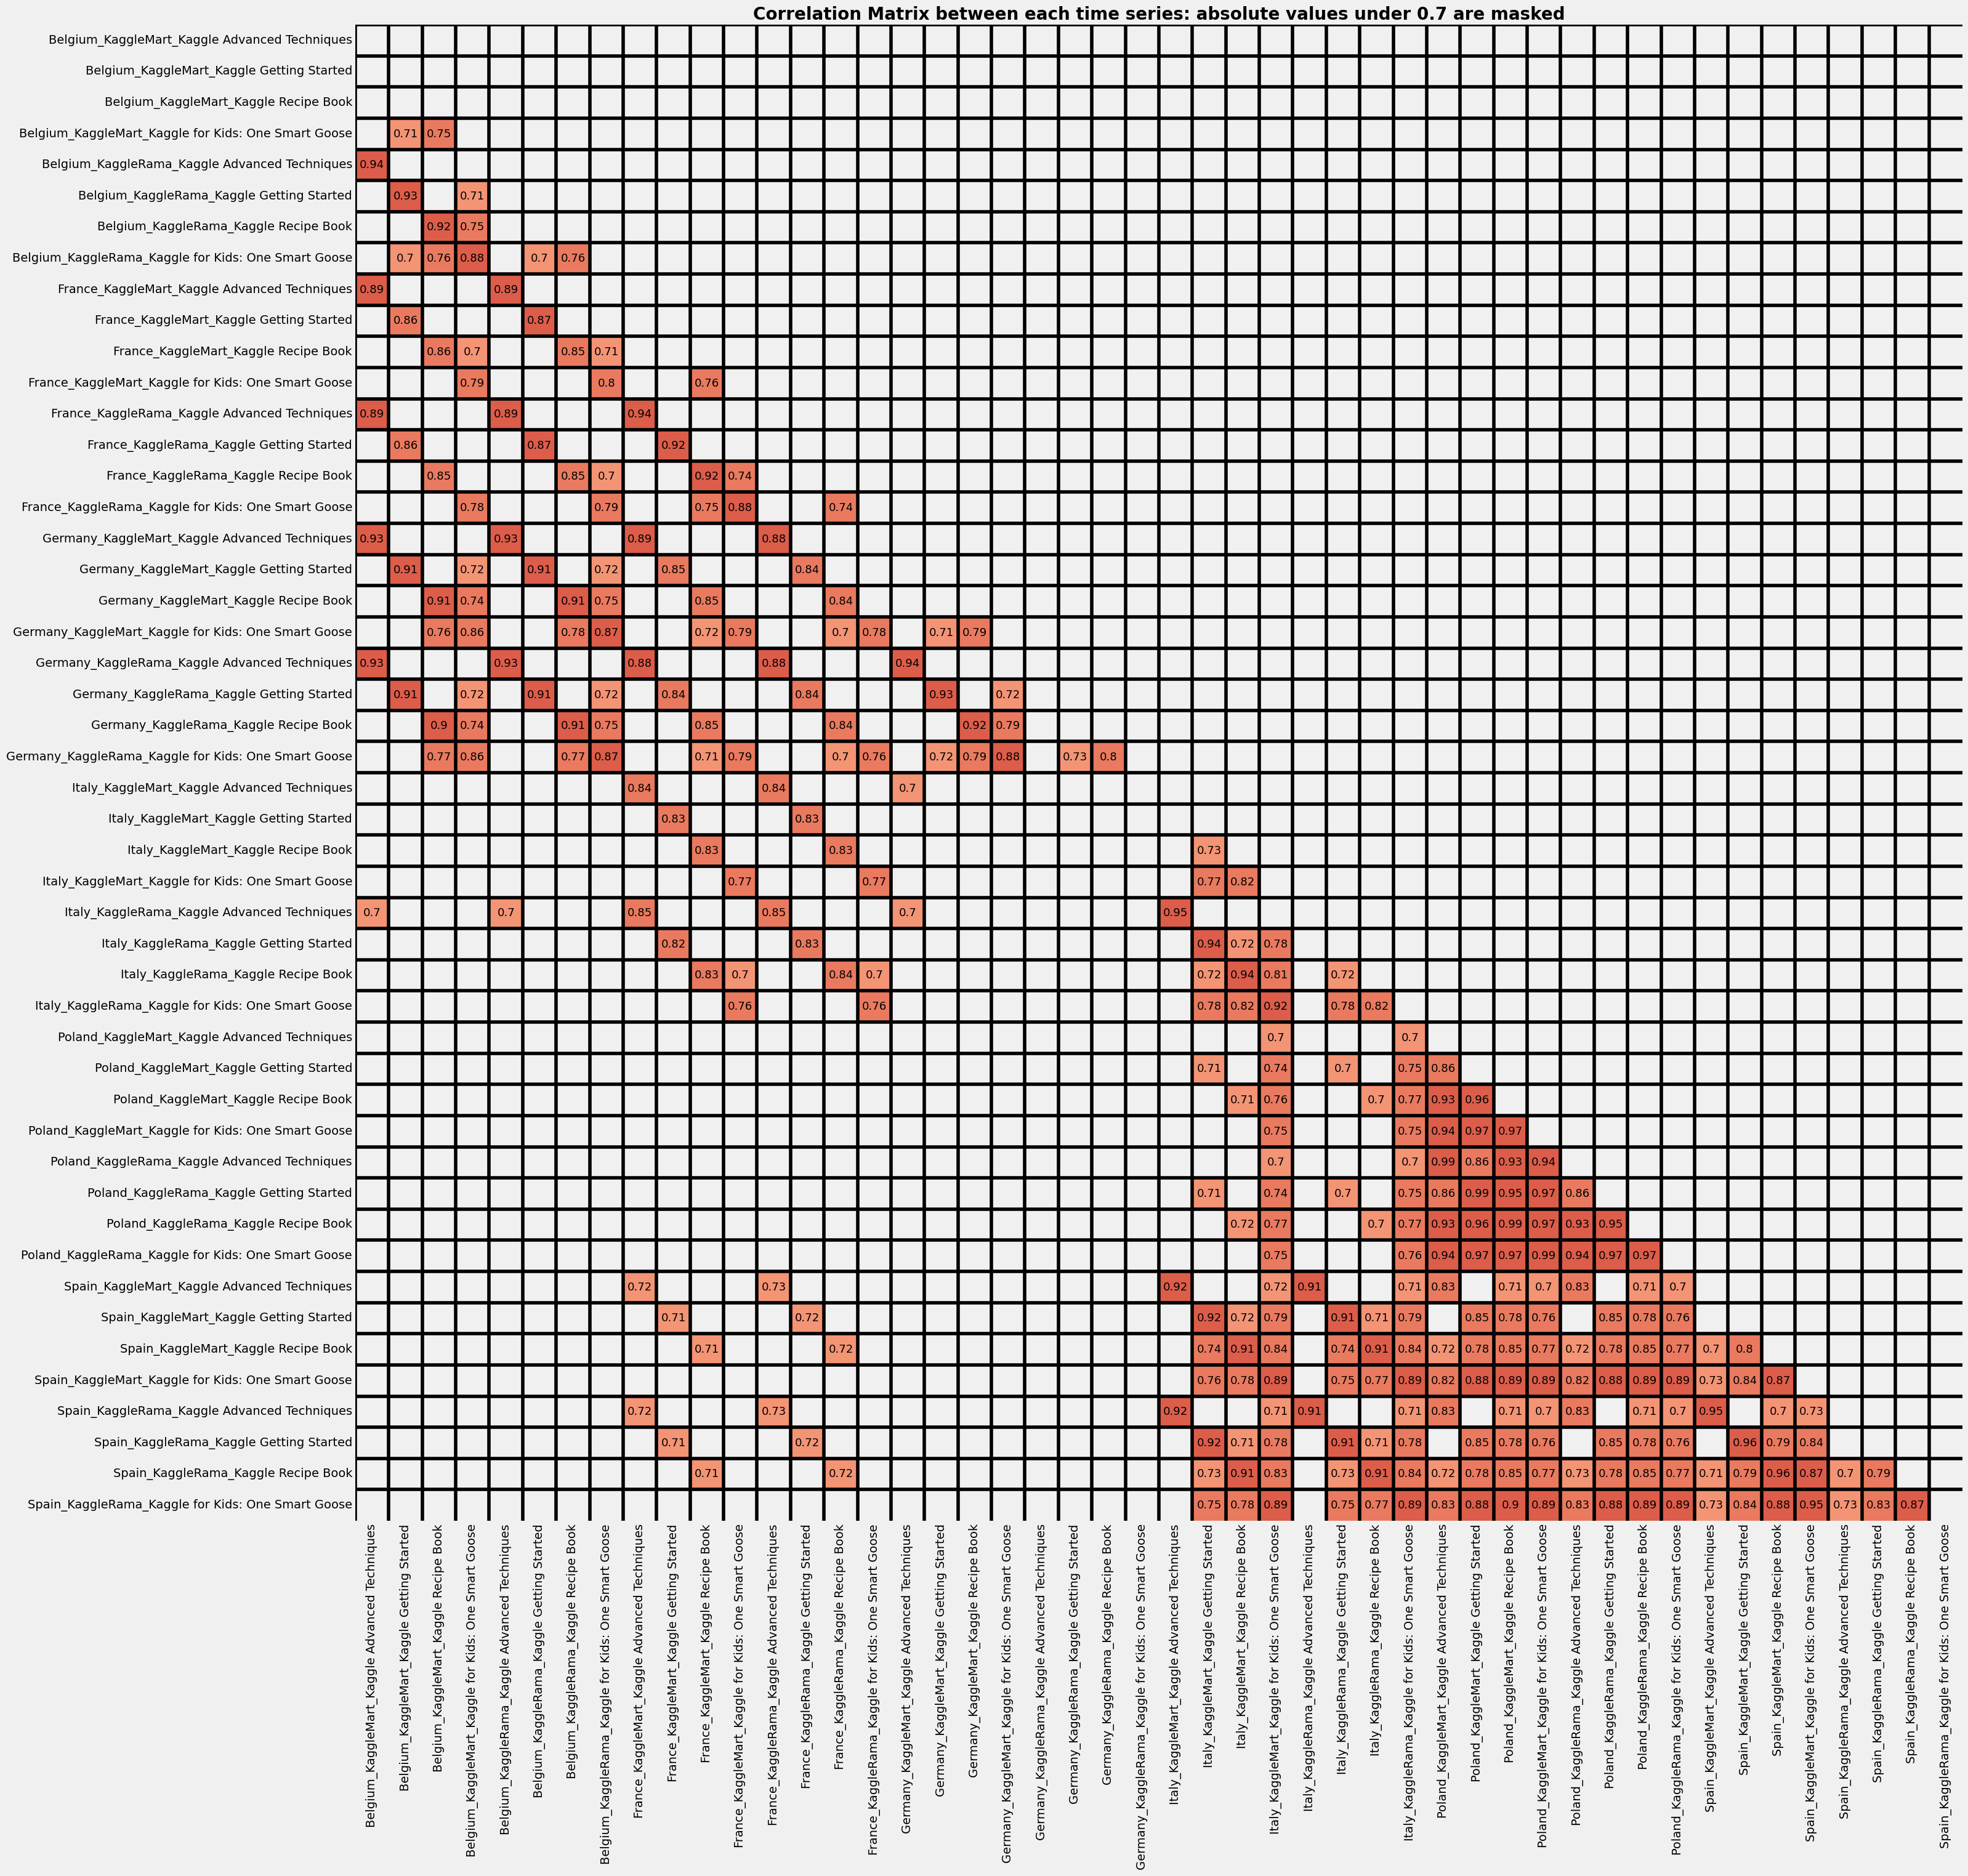

In [22]:
# 데이터 pivoting
all_time_series = (train.drop(['row_id'], axis = 1).pivot(columns = ['country', 'store', 'product'], index = 'date', values = 'num_sold'))
all_time_series.columns = list(map(lambda x: "_".join(x), all_time_series.columns))

# numpy array 설정
corr_matrix = round(all_time_series.corr(), 2)

# np.triu = 행렬의 주대각선 기준 위쪽 삼각형 부분을 추출
mask_feature = np.triu(np.ones_like(corr_matrix, dtype=bool))

# np.linspace = -1부터 1까지 16등분
levels = np.linspace(-1, 1, 16)
colors = sns.color_palette('coolwarm', 16)
cmap_plot, norm = matplotlib.colors.from_levels_and_colors(levels, colors, extend="max")

fig, ax = plt.subplots(1, 1, figsize = (30, 30))

sns.heatmap(corr_matrix, 
            mask = mask_feature or (np.abs(corr_matrix) < 0.7),
            annot=True, ax = ax, cbar=False,
            cmap = cmap_plot, 
            norm = norm, annot_kws={"size": 13, "color": 'black'
                                   # , 'fontweight' : 'bold'
                                   })

ax.hlines(range(corr_matrix.shape[1]), *ax.get_xlim(), color = 'black')
ax.vlines(range(corr_matrix.shape[1]), *ax.get_ylim(), color = 'black')

ax.set_title('Correlation Matrix between each time series: absolute values under 0.7 are masked', fontsize = 20, color = 'black', fontweight = 'bold')

## TFT 모델

### 패키지 로딩
- pytorch_forecasting 패키지 로딩 시 numba 호출 관련 오류 발생 가능
    - numba, llvmlite 패키지 삭제 후 numba 재설치하면 오류 해결 가능

In [39]:
import copy
from pathlib import Path
import holidays

import pytorch_lightning as pl
from pytorch_lightning.callbacks import EarlyStopping, LearningRateMonitor
from pytorch_lightning.loggers import TensorBoardLogger
import torch
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

from pytorch_forecasting import Baseline, TemporalFusionTransformer, TimeSeriesDataSet
from pytorch_forecasting.data import GroupNormalizer, NaNLabelEncoder
from pytorch_forecasting.metrics import SMAPE, PoissonLoss, QuantileLoss
from pytorch_forecasting.models.temporal_fusion_transformer.tuning import optimize_hyperparameters

import tensorflow as tf 
import tensorboard as tb 
tf.io.gfile = tb.compat.tensorflow_stub.io.gfile

import random
import warnings
import gc
warnings.filterwarnings("ignore")

random.seed(30)
np.random.seed(30)
tf.random.set_seed(30)
torch.manual_seed(30)
torch.cuda.manual_seed(30)

### 데이터 전처리

In [37]:
# time_idx 추가: 시작일 - 마지막일 정수형으로 라벨링
data = data.merge((data[['date']].drop_duplicates(ignore_index=True)
.rename_axis('time_idx')).reset_index(), on = ['date'])
data

,row_id,date,country,store,product,num_sold,time_idx
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663.0,0
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615.0,0
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480.0,0
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710.0,0
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240.0,0
...,...,...,...,...,...,...,...
87643,87643,2021-12-31,Spain,KaggleMart,Kaggle for Kids: One Smart Goose,NaN,1825
87644,87644,2021-12-31,Spain,KaggleRama,Kaggle Advanced Techniques,NaN,1825
87645,87645,2021-12-31,Spain,KaggleRama,Kaggle Getting Started,NaN,1825
87646,87646,2021-12-31,Spain,KaggleRama,Kaggle Recipe Book,NaN,1825


In [41]:
# 날짜데이터 추가 생성: 범주형 데이터로 해야 함! object 타입 X
data["day_of_week"] = data.date.dt.dayofweek.astype(str).astype("category")  
data["week_of_year"] = data.date.dt.weekofyear.astype(str).astype("category")  
data["month"] = data.date.dt.month.astype(str).astype("category")

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87648 entries, 0 to 87647
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   row_id        87648 non-null  int64         
 1   date          87648 non-null  datetime64[ns]
 2   country       87648 non-null  object        
 3   store         87648 non-null  object        
 4   product       87648 non-null  object        
 5   num_sold      70128 non-null  float64       
 6   time_idx      87648 non-null  int64         
 7   day_of_week   87648 non-null  category      
 8   week_of_year  87648 non-null  category      
 9   month         87648 non-null  category      
dtypes: category(3), datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 5.6+ MB


#### 데이터에 로그를 취하는 이유
- **스케일 조정**: 데이터의 값이 큰 범위로 분포하는 경우에 로그 변환을 적용하면 값의 스케일을 줄일 수 있음

- **정규 분포 근사**: 일부 통계 분석 기법은 데이터가 정규 분포를 따를 때 가장 잘 작동, 로그 변환을 통해 데이터의 분포를 정규 분포에 가깝게 만들어줄 수 있음

- **오차의 분산 안정화**: 일부 모델은 종속 변수의 오차가 일정한 분산을 가질 때 가장 잘 작동, 로그 변환을 적용하면 데이터의 오차의 분산을 안정화시킬 수 있음. **시계열 데이터 분석이나 회귀 모델**에서 유용

- **특징 강조**: 데이터의 특정 특성을 강조하기 위해 로그 변환을 사용

In [42]:
# 데이터 연산
## 종속 변수 로그 연산
data["log_num_sold"] = np.log(data["num_sold"] + 1e-8)

In [43]:
# time_idx, country별 평균 구한 후 각 행에 추가
data["avg_volume_by_country"] = data.groupby(["time_idx", "country"], observed=True).num_sold.transform("mean")
data["avg_volume_by_store"] = data.groupby(["time_idx", "store"], observed=True).num_sold.transform("mean")
data["avg_volume_by_product"] = data.groupby(["time_idx", "product"], observed=True).num_sold.transform("mean")

data

,row_id,date,country,store,product,num_sold,time_idx,day_of_week,week_of_year,month,log_num_sold,avg_volume_by_country,avg_volume_by_store,avg_volume_by_product
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663.0,0,6,52,1,6.496775,415.0,471.416667,355.583333
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615.0,0,6,52,1,6.421622,415.0,471.416667,291.000000
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480.0,0,6,52,1,6.173786,415.0,471.416667,241.666667
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710.0,0,6,52,1,6.565265,415.0,471.416667,391.083333
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240.0,0,6,52,1,5.480639,415.0,168.250000,355.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87643,87643,2021-12-31,Spain,KaggleMart,Kaggle for Kids: One Smart Goose,NaN,1825,4,52,12,NaN,NaN,NaN,NaN
87644,87644,2021-12-31,Spain,KaggleRama,Kaggle Advanced Techniques,NaN,1825,4,52,12,NaN,NaN,NaN,NaN
87645,87645,2021-12-31,Spain,KaggleRama,Kaggle Getting Started,NaN,1825,4,52,12,NaN,NaN,NaN,NaN
87646,87646,2021-12-31,Spain,KaggleRama,Kaggle Recipe Book,NaN,1825,4,52,12,NaN,NaN,NaN,NaN


In [49]:
# 나라별 공휴일 범주 데이터 라벨링
unique_dates_country = data[['date', 'country']].drop_duplicates(ignore_index = True)

# 특정일 기준 공휴일 유무 라벨링
unique_dates_country['is_holiday'] = unique_dates_country.apply(lambda x: x["date"] in holidays.country_holidays(x["country"]), axis = 1).astype('category')

# 특정일 기준 하루 뒤, 이틀 뒤 공휴일 유무 라벨링
unique_dates_country['is_holiday_lead_1'] = unique_dates_country.apply(lambda x: x["date"] + pd.Timedelta(days = 1) in holidays.country_holidays(x["country"]), axis = 1).astype('category')
unique_dates_country['is_holiday_lead_2'] = unique_dates_country.apply(lambda x: x["date"] + pd.Timedelta(days = 2) in holidays.country_holidays(x["country"]), axis = 1).astype('category')

# 특정일 기준 하루 전, 이틀 전 공휴일 유무 라벨링
unique_dates_country['is_holiday_lag_1'] = unique_dates_country.apply(lambda x: x["date"] - pd.Timedelta(days = 1) in holidays.country_holidays(x["country"]), axis = 1).astype('category')
unique_dates_country['is_holiday_lag_2'] = unique_dates_country.apply(lambda x: x["date"] - pd.Timedelta(days = 2) in holidays.country_holidays(x["country"]), axis = 1).astype('category')

data = data.merge(unique_dates_country, on = ['date', 'country'], validate = "m:1")

In [51]:
data.merge(unique_dates_country, on = ['date', 'country'], validate = "m:1")

,row_id,date,country,store,product,num_sold,time_idx,day_of_week,week_of_year,month,log_num_sold,avg_volume_by_country,avg_volume_by_store,avg_volume_by_product,is_holiday,is_holiday_lead_1,is_holiday_lead_2,is_holiday_lag_1,is_holiday_lag_2
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663.0,0,6,52,1,6.496775,415.0,471.416667,355.583333,True,False,False,False,False
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615.0,0,6,52,1,6.421622,415.0,471.416667,291.000000,True,False,False,False,False
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480.0,0,6,52,1,6.173786,415.0,471.416667,241.666667,True,False,False,False,False
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710.0,0,6,52,1,6.565265,415.0,471.416667,391.083333,True,False,False,False,False
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240.0,0,6,52,1,5.480639,415.0,168.250000,355.583333,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87643,87643,2021-12-31,Spain,KaggleMart,Kaggle for Kids: One Smart Goose,NaN,1825,4,52,12,NaN,NaN,NaN,NaN,False,True,False,False,False
87644,87644,2021-12-31,Spain,KaggleRama,Kaggle Advanced Techniques,NaN,1825,4,52,12,NaN,NaN,NaN,NaN,False,True,False,False,False
87645,87645,2021-12-31,Spain,KaggleRama,Kaggle Getting Started,NaN,1825,4,52,12,NaN,NaN,NaN,NaN,False,True,False,False,False
87646,87646,2021-12-31,Spain,KaggleRama,Kaggle Recipe Book,NaN,1825,4,52,12,NaN,NaN,NaN,NaN,False,True,False,False,False


In [50]:
data.merge(unique_dates_country, on = ['date', 'country'])

,row_id,date,country,store,product,num_sold,time_idx,day_of_week,week_of_year,month,log_num_sold,avg_volume_by_country,avg_volume_by_store,avg_volume_by_product,is_holiday,is_holiday_lead_1,is_holiday_lead_2,is_holiday_lag_1,is_holiday_lag_2
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663.0,0,6,52,1,6.496775,415.0,471.416667,355.583333,True,False,False,False,False
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615.0,0,6,52,1,6.421622,415.0,471.416667,291.000000,True,False,False,False,False
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480.0,0,6,52,1,6.173786,415.0,471.416667,241.666667,True,False,False,False,False
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710.0,0,6,52,1,6.565265,415.0,471.416667,391.083333,True,False,False,False,False
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240.0,0,6,52,1,5.480639,415.0,168.250000,355.583333,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87643,87643,2021-12-31,Spain,KaggleMart,Kaggle for Kids: One Smart Goose,NaN,1825,4,52,12,NaN,NaN,NaN,NaN,False,True,False,False,False
87644,87644,2021-12-31,Spain,KaggleRama,Kaggle Advanced Techniques,NaN,1825,4,52,12,NaN,NaN,NaN,NaN,False,True,False,False,False
87645,87645,2021-12-31,Spain,KaggleRama,Kaggle Getting Started,NaN,1825,4,52,12,NaN,NaN,NaN,NaN,False,True,False,False,False
87646,87646,2021-12-31,Spain,KaggleRama,Kaggle Recipe Book,NaN,1825,4,52,12,NaN,NaN,NaN,NaN,False,True,False,False,False


In [ ]:



del unique_dates_country
gc.collect()

data.sample(5, random_state=30)